In [25]:
import pandas as pd

# Load news data
news_df = pd.read_csv('news.tsv', sep='\t', header=None)
news_df.columns = ['news_id', 'category', 'subcategory', 'title', 'abstract', 
                   'url', 'title_entities', 'abstract_entities']

# Load user behavior data
behaviors_df = pd.read_csv('behaviors.tsv', sep='\t', header=None)
behaviors_df.columns = ['impression_id', 'user_id', 'timestamp', 
                        'user_history', 'impressions']

print(news_df.head())
print(behaviors_df.head())


  news_id   category               subcategory  \
0  N88753  lifestyle           lifestyleroyals   
1  N45436       news  newsscienceandtechnology   
2  N23144     health                weightloss   
3  N86255     health                   medical   
4  N93187       news                 newsworld   

                                               title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1    Walmart Slashes Prices on Last-Generation iPads   
2                      50 Worst Habits For Belly Fat   
3  Dispose of unwanted prescription drugs during ...   
4  The Cost of Trump's Aid Freeze in the Trenches...   

                                            abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  Apple's new iPad releases bring big deals on l...   
2  These seemingly harmless habits are holding yo...   
3                                                NaN   
4  Lt. Ivan Molchanets peeked over a parapet of s...   

                         

In [26]:
pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns




/var/folders/dh/ztd6pgds29v2f75pwff5mls80000gn/T/ipykernel_3873/2322904242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


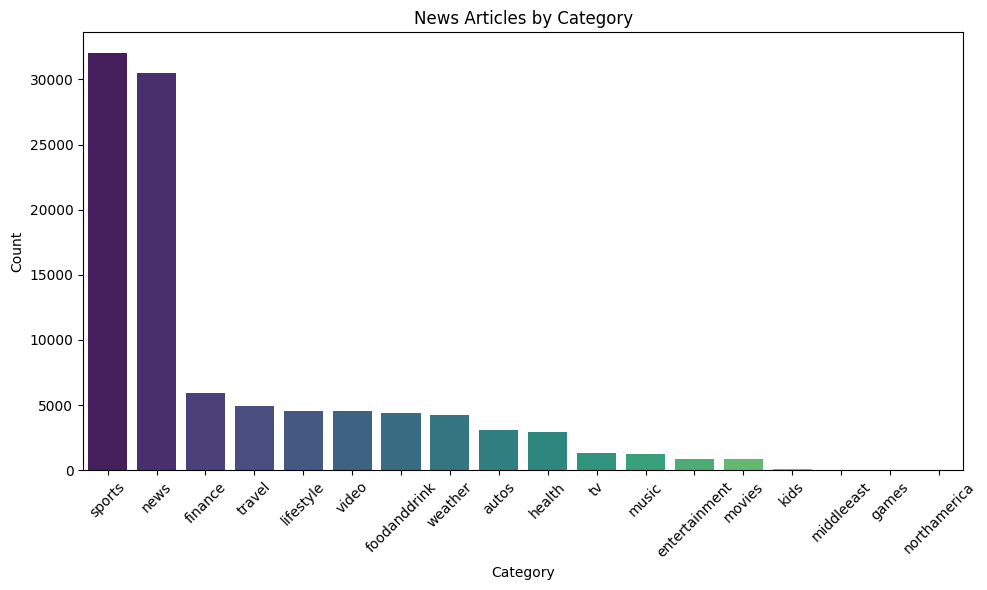

In [28]:


# Count news articles by category
category_counts = news_df['category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("News Articles by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [29]:
# USER LEVEL BEHAVIOR ANALYSIS

In [30]:
# Load behaviors.tsv
behaviors_df = pd.read_csv("behaviors.tsv", sep='\t', header=None,
                           names=['impression_id', 'user_id', 'timestamp', 'history', 'impressions'])

print("Sample Behaviors Data:")
print(behaviors_df.head())


Sample Behaviors Data:
   impression_id  user_id               timestamp  \
0              1   U87243  11/10/2019 11:30:54 AM   
1              2  U598644   11/12/2019 1:45:29 PM   
2              3  U532401  11/13/2019 11:23:03 AM   
3              4  U593596  11/12/2019 12:24:09 PM   
4              5  U239687   11/14/2019 8:03:01 PM   

                                             history  \
0  N8668 N39081 N65259 N79529 N73408 N43615 N2937...   
1  N56056 N8726 N70353 N67998 N83823 N111108 N107...   
2  N128643 N87446 N122948 N9375 N82348 N129412 N5...   
3  N31043 N39592 N4104 N8223 N114581 N92747 N1207...   
4  N65250 N122359 N71723 N53796 N41663 N41484 N11...   

                                         impressions  
0  N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...  
1  N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...  
2              N103852-0 N53474-0 N127836-0 N47925-1  
3  N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...  
4  N76209-0 N48841-0 N67937-0 N62235-0 N6307-0

In [31]:
from collections import defaultdict

# Create a lookup: news_id -> category (this is fast)
news_id_to_category = dict(zip(news_df['news_id'], news_df['category']))

# Store: user_id -> list of categories they clicked
user_click_categories = defaultdict(list)

# Loop through behaviors
for index, row in behaviors_df.iterrows():
    user_id = row['user_id']
    impressions = row['impressions'].split()

    for imp in impressions:
        news_id, clicked = imp.split('-')
        if clicked == '1' and news_id in news_id_to_category:
            user_click_categories[user_id].append(news_id_to_category[news_id])

# Convert to DataFrame
user_category_df = pd.DataFrame([
    {"user_id": uid, "clicked_categories": cats}
    for uid, cats in user_click_categories.items()
])

print("Optimized user-category data ready:")
print(user_category_df.head())


Optimized user-category data ready:
   user_id                                 clicked_categories
0   U87243  [movies, news, news, music, travel, news, news...
1  U598644  [news, music, news, weather, weather, travel, ...
2  U532401             [news, news, entertainment, lifestyle]
3  U593596  [foodanddrink, news, autos, health, finance, a...
4  U239687  [video, sports, sports, sports, sports, news, ...


In [ ]:
# Count Unique Categories per User

count    711222.000000
mean          2.826593
std           1.993307
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          14.000000
Name: unique_category_count, dtype: float64


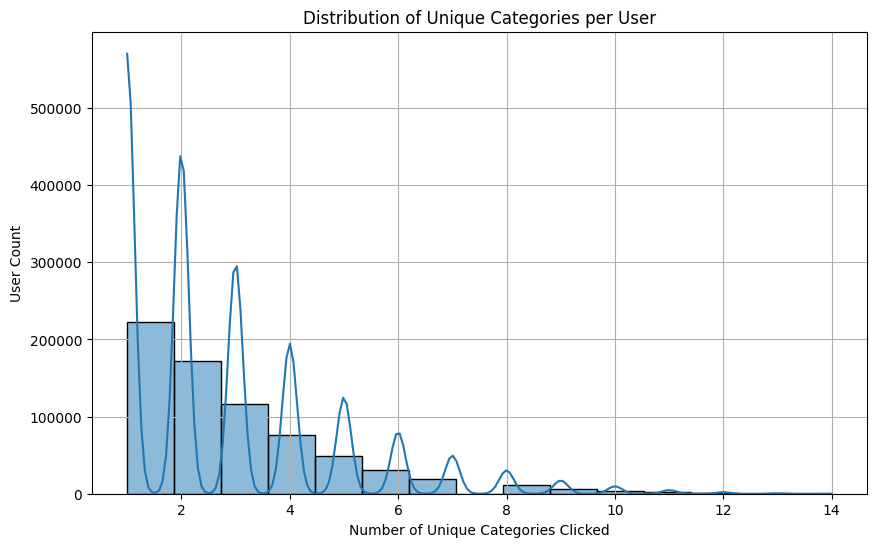

In [32]:
# Add a column that counts how many *distinct* categories each user clicked
user_category_df['unique_category_count'] = user_category_df['clicked_categories'].apply(lambda x: len(set(x)))

# Basic stats
print(user_category_df['unique_category_count'].describe())

# Plot distribution
plt.figure(figsize=(10,6))
sns.histplot(user_category_df['unique_category_count'], bins=15, kde=True)
plt.title("Distribution of Unique Categories per User")
plt.xlabel("Number of Unique Categories Clicked")
plt.ylabel("User Count")
plt.grid(True)
plt.show()


In [ ]:
# 3.Echo Chamber Across:

In [ ]:
# Echo Chamber vs. User Click Count

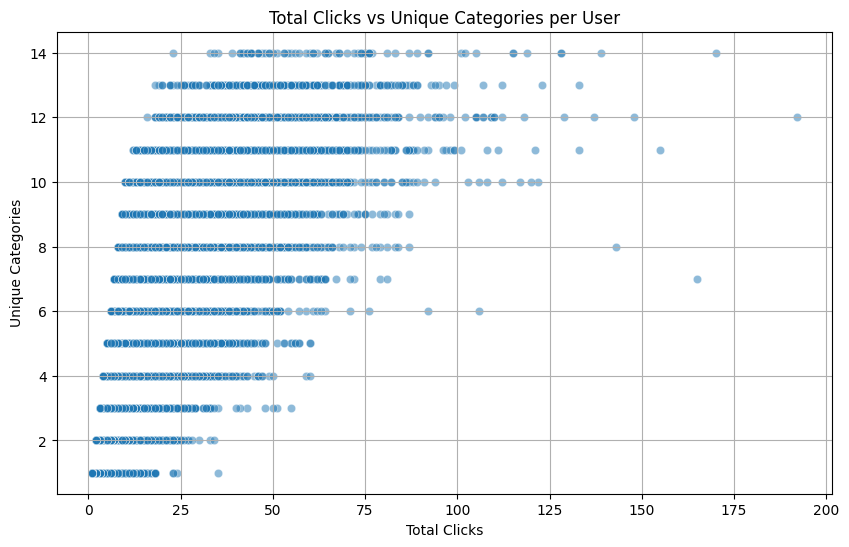

In [33]:
# Add a new column: total number of articles clicked
user_category_df['total_clicks'] = user_category_df['clicked_categories'].apply(len)

# Scatter plot: total clicks vs. unique categories
plt.figure(figsize=(10,6))
sns.scatterplot(data=user_category_df, x='total_clicks', y='unique_category_count', alpha=0.5)
plt.title("Total Clicks vs Unique Categories per User")
plt.xlabel("Total Clicks")
plt.ylabel("Unique Categories")
plt.grid(True)
plt.show()


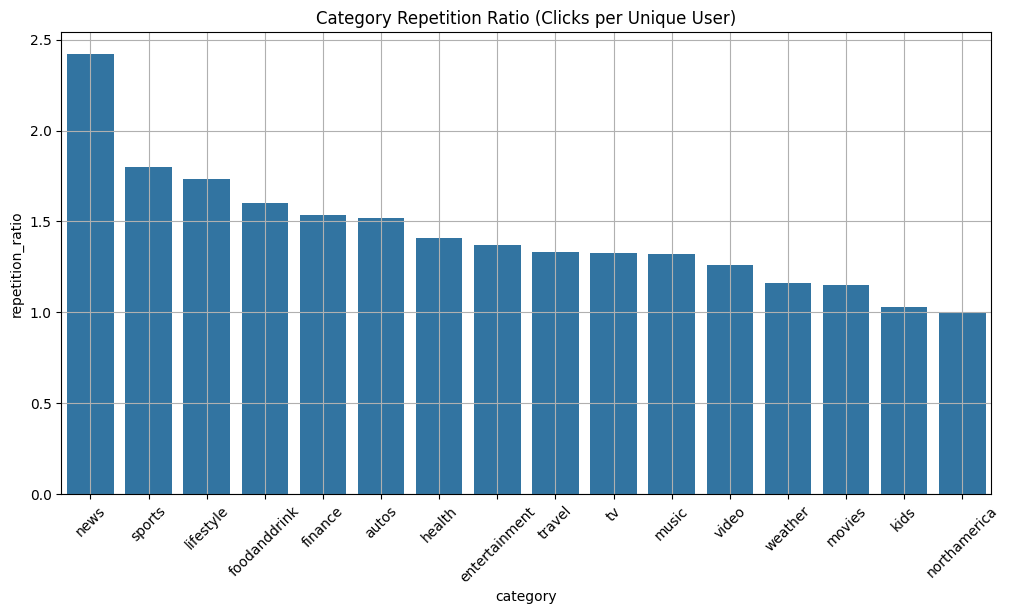

In [34]:
from collections import defaultdict

# Dictionary to hold all category clicks per category
category_click_map = defaultdict(list)

# Fill the dictionary
for categories in user_category_df['clicked_categories']:
    for cat in categories:
        category_click_map[cat].append(1)

# Count how many users clicked each category at least once
category_user_count = defaultdict(int)
for categories in user_category_df['clicked_categories']:
    for cat in set(categories):  # Use set to count each user only once per category
        category_user_count[cat] += 1

# Compute repetition ratio = total clicks on category / unique users who clicked it
repetition_ratio = {
    cat: sum(clicks) / category_user_count[cat]
    for cat, clicks in category_click_map.items()
}

# Convert to DataFrame for plotting
import pandas as pd
repetition_df = pd.DataFrame(list(repetition_ratio.items()), columns=['category', 'repetition_ratio'])
repetition_df = repetition_df.sort_values(by='repetition_ratio', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=repetition_df, x='category', y='repetition_ratio')
plt.title("Category Repetition Ratio (Clicks per Unique User)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



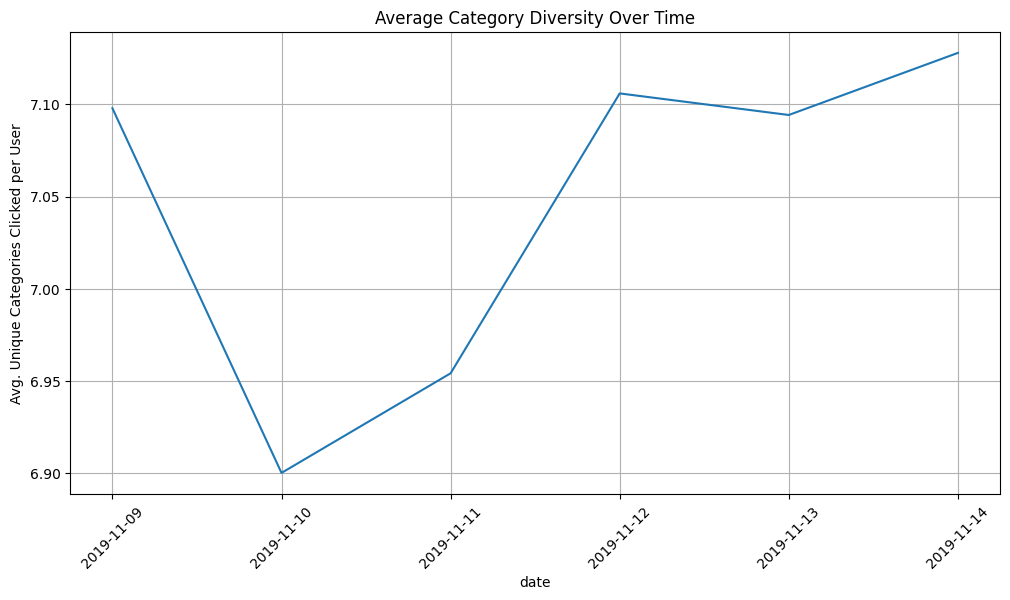

In [35]:
# Re-load behavior data with timestamp
behavior_df = pd.read_csv('behaviors.tsv', sep='\t', header=None, names=[
    'impression_id', 'user_id', 'timestamp', 'history', 'impressions'])

# Convert timestamp to datetime
behavior_df['timestamp'] = pd.to_datetime(behavior_df['timestamp'])

# Sort data by timestamp
behavior_df = behavior_df.sort_values('timestamp')

# Merge news data to extract categories per impression
impression_category_map = news_df.set_index('news_id')['category'].to_dict()

# Track user exposure diversity over time
from collections import defaultdict

user_time_category = defaultdict(set)
records = []

for idx, row in behavior_df.iterrows():
    time = row['timestamp'].date()
    uid = row['user_id']
    history = str(row['history']).split()
    categories = {impression_category_map.get(nid, 'unknown') for nid in history}
    
    if categories:
        user_time_category[(uid, time)].update(categories)
        records.append({
            'user_id': uid,
            'date': time,
            'category_count': len(user_time_category[(uid, time)])
        })

# Create DataFrame
temporal_df = pd.DataFrame(records)

# Plot average category diversity over time
daily_avg = temporal_df.groupby('date')['category_count'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_avg, x='date', y='category_count')
plt.title("Average Category Diversity Over Time")
plt.ylabel("Avg. Unique Categories Clicked per User")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Ends Thankyou! :)